Chapter 4 # Training Models

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Generate the linear data

In [22]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
Y = 4 + 3 * X + np.random.randn(m,1)


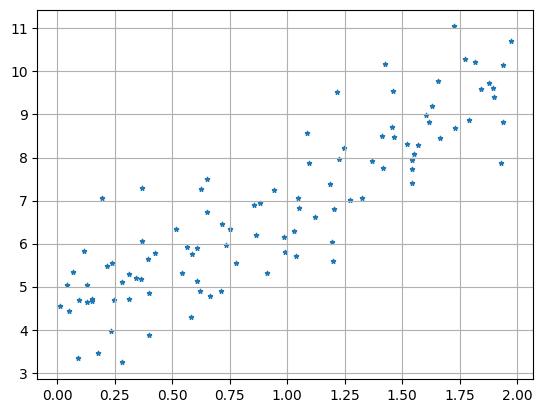

In [23]:

plt.scatter(X, Y, marker='*',s=10)
plt.grid(visible=True)
plt.show()

In [24]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X,value=1)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y
theta_best

array([[4.21509616],
       [2.77011339]])

In [25]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

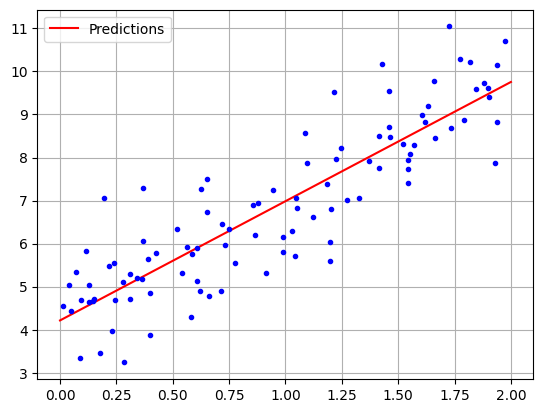

In [26]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.grid(visible=True)
plt.legend()
plt.plot(X, Y, 'b.')
plt.show()

By using sklearn

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y=Y)


LinearRegression()

In [28]:
model.intercept_, model.coef_

(array([4.21509616]), array([[2.77011339]]))

In [29]:
model_y_predict = model.predict(X_new)

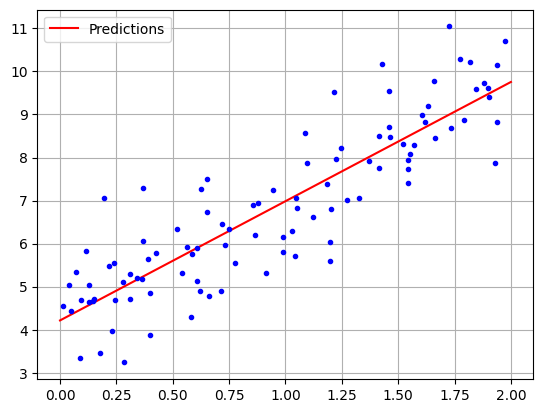

In [30]:
plt.plot(X_new, model_y_predict, 'r-', label='Predictions')
plt.grid(visible=True)
plt.legend()
plt.plot(X, Y, 'b.')
plt.show()

In [31]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y, 
rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [32]:
n = np.array([[1],[2]])
k = np.linalg.pinv(n)
k

array([[0.2, 0.4]])

How to add the ploynomial feature to array

In [33]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pandas as pd

In [34]:
x = np.array([[2, 4]])

poly = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly.fit_transform(x)
x_poly

# [[2, 4]]

# 1. 2, 4
# 2. 2^2, 2*4, 4^2

array([[ 2.,  4.,  4.,  8., 16.]])

how to the ploynomial features to dataset

In [35]:

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Keep only numeric column we want (e.g., Age)
df = titanic[['age', 'fare']].dropna()
print(df.head())


    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [36]:
# Select the column you want to expand
X_age = df[['age']]

# Polynomial transformer
poly = PolynomialFeatures(degree=3, include_bias=False)

X_age_poly = poly.fit_transform(X_age)

# Get feature names
feature_names = poly.get_feature_names_out(['age'])

# Convert to DataFrame
df_age_poly = pd.DataFrame(X_age_poly, columns=feature_names)

print(df_age_poly.head())


    age   age^2    age^3
0  22.0   484.0  10648.0
1  38.0  1444.0  54872.0
2  26.0   676.0  17576.0
3  35.0  1225.0  42875.0
4  35.0  1225.0  42875.0
